In [159]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Read in CSV file
filepath = "cost_of_living_us.csv"
data = pd.read_csv(filepath)
df = pd.DataFrame(data)
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [160]:
# Drop data from other states, only include Ohio data (temporary?)
#df = df.loc[df["state"] == "OH"]
df.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [161]:
# Clean dataframe
df = df.rename(columns={"case_id": "Case ID",
                        "state": "State",
                        "isMetro": "Metro",
                        "areaname": "Area Name",
                        "county": "County",
                        "family_member_count": "Number of Adults/Children",
                        "housing_cost": "Housing Cost",
                        "food_cost": "Food Cost",
                        "transportation_cost": "Transportation Cost",
                        "healthcare_cost": "Healthcare Cost",
                        "other_necessities_cost": "Other Necessities Cost",
                        "childcare_cost": "Childcare Cost",
                        "taxes": "Taxes",
                        "total_cost": "Total Cost",
                        "median_family_income": "Median Income"})
df.head()

,Case ID,State,Metro,Area Name,County,Number of Adults/Children,Housing Cost,Food Cost,Transportation Cost,Healthcare Cost,Other Necessities Cost,Childcare Cost,Taxes,Total Cost,Median Income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [162]:
# Group by metro/rural
df_Metro = df.groupby("Metro").mean(numeric_only=True)
df_Metro.drop(columns=["Case ID"],inplace=True)
df_Costs = df_Metro.drop(columns=["Total Cost","Median Income"])
df_Totals = df_Metro[["Total Cost","Median Income"]]
df_Metro.head()

,Housing Cost,Food Cost,Transportation Cost,Healthcare Cost,Other Necessities Cost,Childcare Cost,Taxes,Total Cost,Median Income
Metro,,,,,,,,,
False,9895.308705,8165.377513,13721.750019,13707.946043,6544.098883,8729.840612,6823.694820,67588.016584,62826.026868
True,13060.779367,8493.450419,13378.186169,12864.670291,7809.947489,11818.425399,9064.143316,76489.602427,77581.789236


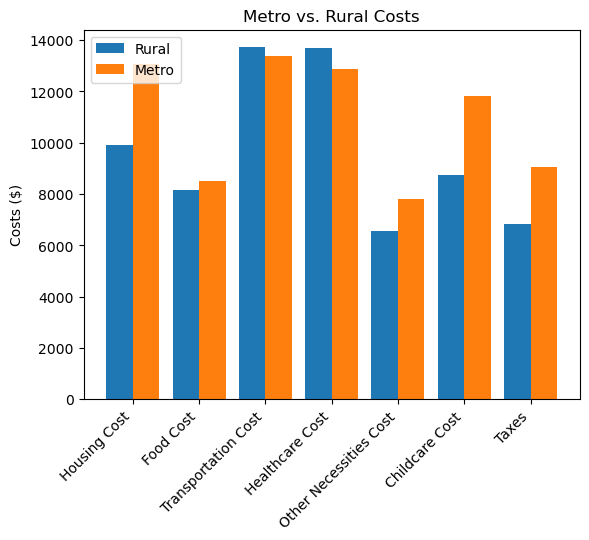

In [163]:
# Plot cost breakdown
rural_data = df_Costs.iloc[0]
metro_data = df_Costs.iloc[1]
x_axis = np.arange(len(rural_data.index))
width = 0.4
plt.bar(x_axis-width/2,rural_data,width=width,label="Rural")
plt.bar(x_axis+width/2,metro_data,width=width,label="Metro")
plt.title("Metro vs. Rural Costs")
plt.legend(loc='upper left')
plt.xticks(np.arange(0,7,step=1),df_Costs.columns,rotation=45,ha='right')
plt.ylabel("Costs ($)")
plt.show()

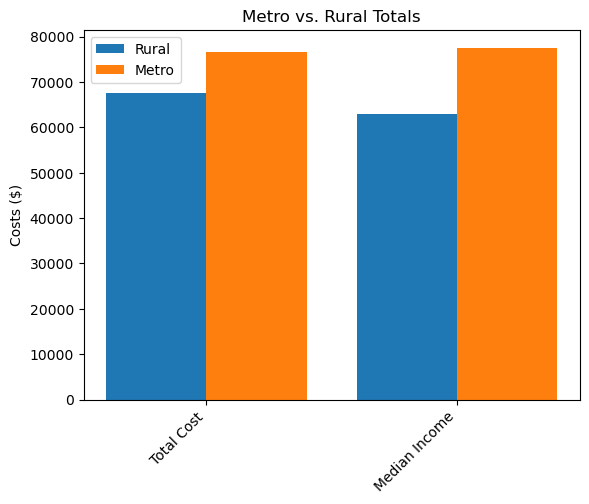

In [164]:
# Plot total costs and median incomes
rural_data = df_Totals.iloc[0]
metro_data = df_Totals.iloc[1]
x_axis = np.arange(len(rural_data.index))
plt.bar(x_axis-width/2,rural_data,width=width,label="Rural")
plt.bar(x_axis+width/2,metro_data,width=width,label="Metro")
plt.title("Metro vs. Rural Totals")
plt.legend(loc='upper left')
plt.xticks(np.arange(0,2,step=1),df_Totals.columns,rotation=45,ha='right')
plt.ylabel("Costs ($)")
plt.show()

In [165]:
# Reformat # of Adults/Children column
adults = df["Number of Adults/Children"].str[0]
children = df["Number of Adults/Children"].str[2]
total_residents = adults.astype(int) + children.astype(int)
df.insert(6,"Adults",adults.astype(int),True)
df.insert(7,"Children",children.astype(int),True)
df.insert(8,"Total Residents",total_residents,True)
df.head(10)

,Case ID,State,Metro,Area Name,County,Number of Adults/Children,Adults,Children,Total Residents,Housing Cost,Food Cost,Transportation Cost,Healthcare Cost,Other Necessities Cost,Childcare Cost,Taxes,Total Cost,Median Income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,1,0,1,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,1,1,2,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,1,2,3,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,1,3,4,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,1,4,5,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,2,0,2,10180.29420,6334.01436,12861.88680,11474.95968,5983.78524,0.0000,8236.73076,55071.6684,73010.414062
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,2,1,3,12067.50240,7883.31888,13589.11200,14397.03720,7228.96944,6147.8298,9459.90240,70773.6744,73010.414062
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,2,2,4,12067.50240,9984.05268,14723.60760,17319.11280,7990.14840,15824.6940,11168.75028,89077.8696,73010.414062
8,1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,2,3,5,15257.15040,12189.77040,14994.60000,20241.18720,9945.10176,18802.1892,13210.14840,104640.1524,73010.414062
9,1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,2,4,6,15257.15040,14917.35840,15064.26360,23163.26520,10933.41504,18802.1892,13417.21920,111554.8596,73010.414062


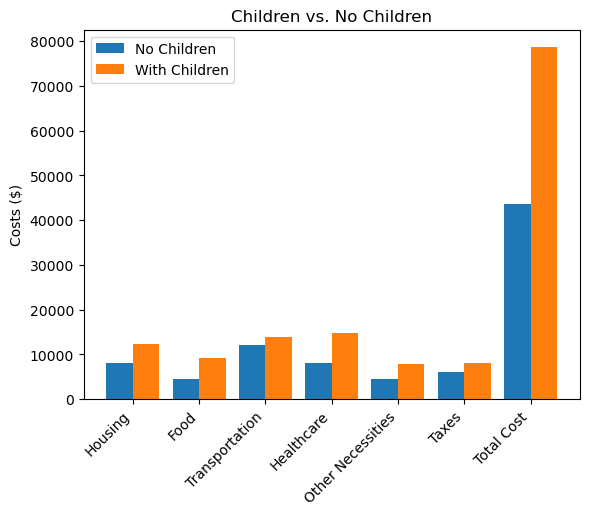

In [166]:
# Separate dataframe into children and no children
df_noChildren = df.loc[df["Children"] == 0]
df_withChildren = df.loc[df["Children"] != 0]
# Group by county and take averages of relevant columns
df_noChildren = df_noChildren.groupby("County").mean(numeric_only=True)
noChildren_data = [df_noChildren["Housing Cost"].mean(),
                   df_noChildren["Food Cost"].mean(),
                   df_noChildren["Transportation Cost"].mean(),
                   df_noChildren["Healthcare Cost"].mean(),
                   df_noChildren["Other Necessities Cost"].mean(),
                   df_noChildren["Taxes"].mean(),
                   df_noChildren["Total Cost"].mean()]
df_withChildren = df_withChildren.groupby("County").mean(numeric_only=True)
withChildren_data = [df_withChildren["Housing Cost"].mean(),
                     df_withChildren["Food Cost"].mean(),
                     df_withChildren["Transportation Cost"].mean(),
                     df_withChildren["Healthcare Cost"].mean(),
                     df_withChildren["Other Necessities Cost"].mean(),
                     df_withChildren["Taxes"].mean(),
                     df_withChildren["Total Cost"].mean()]
# Plot
x_axis = np.arange(0,len(noChildren_data),step=1)
plt.bar(x_axis-width/2,noChildren_data,width=width,label="No Children")
plt.bar(x_axis+width/2,withChildren_data,width=width,label="With Children")
plt.title("Children vs. No Children")
plt.legend(loc='upper left')
labels = ["Housing","Food","Transportation","Healthcare","Other Necessities","Taxes","Total Cost"]
plt.xticks(np.arange(0,len(noChildren_data),step=1),labels,rotation=45,ha='right')
plt.ylabel("Costs ($)")
plt.show()